<a href="https://colab.research.google.com/github/jaqmol85/M-TODOS-ESTOCASTICOS/blob/main/Geoestadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO ARTICULO DE COMPARACION DE ALGORITMOS

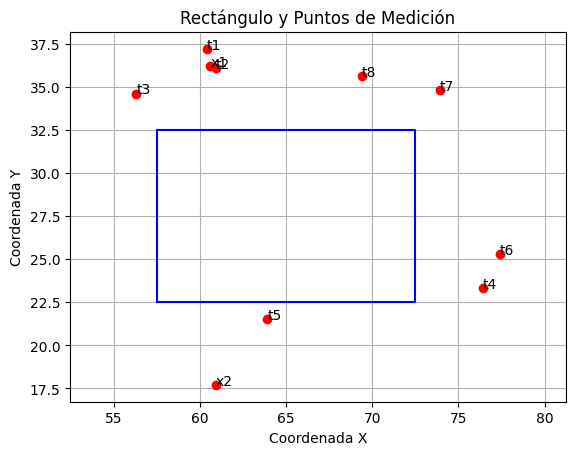

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las esquinas del rectángulo
esquinas = [(57.5, 22.5), (72.5, 22.5), (72.5, 32.5), (57.5, 32.5),]

# Extraer coordenadas x e y de las esquinas
x_esquinas = [esquina[0] for esquina in esquinas]
y_esquinas = [esquina[1] for esquina in esquinas]

# Definir los puntos de medición
puntos_medicion = {
    'x1': (60.6, 36.2),
    'x2': (60.9, 17.7),
    't1': (60.4, 37.2),
    't2': (60.9, 36.1),
    't3': (56.3, 34.6),
    't4': (76.4, 23.3),
    't5': (63.9, 21.5),
    't6': (77.4, 25.3),
    't7': (73.9, 34.8),
    't8': (69.4, 35.6)
}

# Extraer coordenadas x e y de los puntos de medición
x_puntos_medicion = [p[0] for p in puntos_medicion.values()]
y_puntos_medicion = [p[1] for p in puntos_medicion.values()]

# Graficar el rectángulo
plt.plot(x_esquinas + [x_esquinas[0]], y_esquinas + [y_esquinas[0]], 'b-')

# Graficar los puntos de medición
plt.plot(x_puntos_medicion, y_puntos_medicion, 'ro')

# Etiquetar los puntos de medición
for etiqueta, (x, y) in puntos_medicion.items():
    plt.text(x, y, etiqueta)

# Añadir etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Rectángulo y Puntos de Medición')

# Mostrar la gráfica
plt.grid(True)
plt.axis('equal')  # Mantener la relación de aspecto igual
plt.show()

1. SIMULACIÓN ARTÍCULO PRIMER MÉTODO ENUMERACION TOTAL

In [43]:
import itertools
import pandas as pd

# Función para calcular el variograma
def variogram(h):
    if h == 0:
        return 0
    elif abs(h) <= 40:
        return 0.08 + 0.1 * (3/2 * (abs(h)/40) - (1/2) * (abs(h)/40)**3)
    else:
        return 0.18

# Función para calcular la varianza
def calculate_variance(values):
    mean = sum(values) / len(values)
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    return variance

# Puntos de medición dados
x1 = (60.6, 36.2)
x2 = (60.9, 17.7)

# Puntos adicionales dados
additional_points = [
    (60.4, 37.2),
    (60.9, 36.1),
    (56.3, 34.6),
    (76.4, 23.3),
    (63.9, 21.5),
    (77.4, 25.3),
    (73.9, 34.8),
    (69.4, 35.6)
]

# Obtener las primeras 10 combinaciones posibles de puntos adicionales
combinations = list(itertools.combinations(additional_points, 4))[:10]

# Inicializar la mejor combinación y la mejor varianza
best_combination = None
best_variance = float('inf')  # Inicializar con infinito para encontrar la mínima varianza

# Inicializar una lista para almacenar los resultados
results_list = []

# Función para calcular la función objetivo recursivamente
def calculate_objective(combination, index, current_value, iteration):
    global best_variance
    if index == len(combination) or iteration == 10:
        variance = calculate_variance([variogram(abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])) for point1 in [x1, x2] + list(combination) for point2 in [x1, x2] + list(combination)])
        if variance < best_variance:
            best_variance = variance
        return
    for i in range(index, len(combination)):
        new_value = current_value + sum(variogram(abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])) for point1 in [x1, x2] + list(combination) for point2 in [x1, x2] + list(combination))
        if new_value < best_variance:
            calculate_objective(combination, i + 1, new_value, iteration + 1)

# Calcular la función objetivo para cada combinación utilizando el algoritmo de rama y enlace
for combination in combinations:
    calculate_objective(combination, 0, 0, 0)
    results_list.append({'Combination': combination, 'Variance': best_variance})
    best_variance = float('inf')  # Reiniciar la mejor varianza para la siguiente combinación

# Crear un DataFrame a partir de la lista de resultados
results = pd.DataFrame(results_list)

# Ordenar los resultados por la varianza en orden ascendente
results = results.sort_values(by='Variance', ascending=True)

# Mostrar los resultados en forma de tabla
print("Resultados:")
print(results.to_string(index=False))

# Obtener la mejor combinación y su varianza
best_combination = results.iloc[0]['Combination']
best_variance = results.iloc[0]['Variance']

# Imprimir la mejor combinación y su varianza
print("\nMejor combinación de puntos adicionales:", best_combination)
print("Varianza:", best_variance)

Resultados:
                                             Combination  Variance
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (69.4, 35.6))  0.002547
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (63.9, 21.5))  0.002680
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (73.9, 34.8))  0.002779
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (63.9, 21.5))  0.003249
((60.4, 37.2), (60.9, 36.1), (63.9, 21.5), (77.4, 25.3))  0.003276
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (69.4, 35.6))  0.003281
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (73.9, 34.8))  0.003347
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (77.4, 25.3))  0.003363
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (76.4, 23.3))  0.003371
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (77.4, 25.3))  0.003700

Mejor combinación de puntos adicionales: ((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (69.4, 35.6))
Varianza: 0.0025468070344192525


2. MÉTODO ALGORITMO DE RAMA Y ENLACE

In [45]:
import itertools
import pandas as pd

# Función para calcular el variograma
def variogram(h):
    if h == 0:
        return 0
    elif abs(h) <= 40:
        return 0.08 + 0.1 * (3/2 * (abs(h)/40) - (1/2) * (abs(h)/40)**3)
    else:
        return 0.18

# Función para calcular la varianza
def calculate_variance(values):
    mean = sum(values) / len(values)
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    return variance

# Puntos de medición dados
x1 = (60.6, 36.2)
x2 = (60.9, 17.7)

# Puntos adicionales dados
additional_points = [
    (60.4, 37.2),
    (60.9, 36.1),
    (56.3, 34.6),
    (76.4, 23.3),
    (63.9, 21.5),
    (77.4, 25.3),
    (73.9, 34.8),
    (69.4, 35.6)
]

# Obtener las primeras 10 combinaciones posibles de puntos adicionales
combinations = list(itertools.combinations(additional_points, 4))[:10]

# Inicializar la mejor combinación y la mejor función objetivo (en este caso, varianza)
best_combination = None
best_objective_value = float('inf')  # Inicializar con infinito para encontrar la mínima varianza

# Inicializar una lista para almacenar los resultados
results_list = []

# Función para calcular la función objetivo recursivamente
def calculate_objective(combination, index, current_value):
    global best_objective_value
    if index == len(combination):
        variance = calculate_variance([variogram(abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])) for point1 in [x1, x2] + list(combination) for point2 in [x1, x2] + list(combination)])
        if variance < best_objective_value:
            best_objective_value = variance
        return
    for i in range(index, len(combination)):
        new_value = current_value + sum(variogram(abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])) for point1 in [x1, x2] + list(combination) for point2 in [x1, x2] + list(combination))
        if new_value < best_objective_value:
            calculate_objective(combination, i + 1, new_value)

# Calcular la función objetivo para cada combinación utilizando el algoritmo de rama y enlace
for combination in combinations:
    calculate_objective(combination, 0, 0)
    results_list.append({'Combination': combination, 'Variance': best_objective_value})
    best_objective_value = float('inf')  # Reiniciar la mejor varianza para la siguiente combinación

# Crear un DataFrame a partir de la lista de resultados
results = pd.DataFrame(results_list)

# Ordenar los resultados por la varianza en orden ascendente
results = results.sort_values(by='Variance', ascending=True)

# Mostrar los resultados en forma de tabla
print("Resultados:")
print(results.to_string(index=False))

# Obtener la mejor combinación y su varianza
best_combination = results.iloc[0]['Combination']
best_variance = results.iloc[0]['Variance']

# Imprimir la mejor combinación y su varianza
print("\nMejor combinación de puntos adicionales:", best_combination)
print("Varianza:", best_variance)

Resultados:
                                             Combination  Variance
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (69.4, 35.6))  0.002547
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (63.9, 21.5))  0.002680
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (73.9, 34.8))  0.002779
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (63.9, 21.5))  0.003249
((60.4, 37.2), (60.9, 36.1), (63.9, 21.5), (77.4, 25.3))  0.003276
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (69.4, 35.6))  0.003281
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (73.9, 34.8))  0.003347
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (77.4, 25.3))  0.003363
((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (76.4, 23.3))  0.003371
((60.4, 37.2), (60.9, 36.1), (76.4, 23.3), (77.4, 25.3))  0.003700

Mejor combinación de puntos adicionales: ((60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (69.4, 35.6))
Varianza: 0.0025468070344192525


3. METODO DE INCLUSIÓN ÓPTIMA SECUENCIAL DE PUNTOS ADICIONALES

In [49]:
import itertools
import pandas as pd

# Función para calcular el variograma
def variogram(h):
    if h == 0:
        return 0
    elif abs(h) <= 40:
        return 0.08 + 0.1 * (3/2 * (abs(h)/40) - (1/2) * (abs(h)/40)**3)
    else:
        return 0.18

# Función para calcular la varianza
def calculate_variance(values):
    mean = sum(values) / len(values)
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    return variance

# Puntos de medición dados
x1 = (60.6, 36.2)
x2 = (60.9, 17.7)

# Puntos adicionales dados
additional_points = [
    (60.4, 37.2),
    (60.9, 36.1),
    (56.3, 34.6),
    (76.4, 23.3),
    (63.9, 21.5),
    (77.4, 25.3),
    (73.9, 34.8),
    (69.4, 35.6)
]

# Inicializar la lista de puntos adicionales seleccionados
selected_points = []

# Inicializar la mejor combinación y la mejor función objetivo (en este caso, varianza)
best_combination = None
best_objective_value = float('inf')  # Inicializar con infinito para encontrar la mínima varianza

# Inicializar una lista para almacenar los resultados
results_list = []

# Función para calcular la función objetivo para una combinación de puntos adicionales
def evaluate_combination(combination):
    return calculate_variance([variogram(abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])) for point1 in [x1, x2] + list(combination) for point2 in [x1, x2] + list(combination)])

# Iterativamente agregar un punto adicional a la vez y calcular la función objetivo
for i in range(len(additional_points)):
    # Inicializar la mejor combinación y la mejor función objetivo para esta iteración
    best_iteration_combination = None
    best_iteration_objective_value = float('inf')

    # Iterar sobre los puntos adicionales no seleccionados para esta iteración
    for point in additional_points:
        if point not in selected_points:
            # Calcular la función objetivo para la combinación actual + el punto adicional
            current_combination = selected_points + [point]
            objective_value = evaluate_combination(current_combination)

            # Actualizar la mejor combinación y función objetivo si es mejor que el mejor hasta ahora
            if objective_value < best_iteration_objective_value:
                best_iteration_combination = current_combination
                best_iteration_objective_value = objective_value

    # Agregar el punto adicional seleccionado y actualizar la lista de puntos seleccionados
    selected_points = best_iteration_combination
    selected_variance = best_iteration_objective_value

    # Guardar los resultados de esta iteración
    results_list.append({'Iteration': i + 1, 'Selected Points': selected_points, 'Variance': selected_variance})

# Crear un DataFrame a partir de la lista de resultados
results = pd.DataFrame(results_list)

# Mostrar los resultados en forma de tabla
print("Resultados del método de inclusión óptima secuencial:")
print(results.to_string(index=False))

# Obtener la mejor combinación y su varianza
best_combination = results.iloc[-1]['Selected Points']
best_variance = results.iloc[-1]['Variance']

# Imprimir la mejor combinación y su varianza
print("\nMejor combinación de puntos adicionales:", best_combination)
print("Varianza:", best_variance)

Resultados del método de inclusión óptima secuencial:
 Iteration                                                                                                  Selected Points  Variance
         1                                                                                                   [(60.9, 36.1)]  0.003990
         2                                                                                     [(60.9, 36.1), (60.4, 37.2)]  0.003206
         3                                                                       [(60.9, 36.1), (60.4, 37.2), (56.3, 34.6)]  0.002738
         4                                                         [(60.9, 36.1), (60.4, 37.2), (56.3, 34.6), (69.4, 35.6)]  0.002547
         5                                           [(60.9, 36.1), (60.4, 37.2), (56.3, 34.6), (69.4, 35.6), (73.9, 34.8)]  0.002454
         6                             [(60.9, 36.1), (60.4, 37.2), (56.3, 34.6), (69.4, 35.6), (73.9, 34.8), (63.9, 21.5)]  0.002345
        

4. MÉTODO INTERCAMBIOS ÓPTIMOS SECUENCIALES

In [42]:
import itertools
import pandas as pd

# Función para calcular el variograma
def variogram(h):
    if h == 0:
        return 0
    elif abs(h) <= 40:
        return 0.08 + 0.1 * (3/2 * (abs(h)/40) - (1/2) * (abs(h)/40)**3)
    else:
        return 0.18

# Función para calcular la varianza
def calculate_variance(values):
    mean = sum(values) / len(values)
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    return variance

# Puntos de medición dados
x1 = (60.6, 36.2)
x2 = (60.9, 17.7)

# Puntos adicionales dados
additional_points = [
    (60.4, 37.2),
    (60.9, 36.1),
    (56.3, 34.6),
    (76.4, 23.3),
    (63.9, 21.5),
    (77.4, 25.3),
    (73.9, 34.8),
    (69.4, 35.6)
]

# Función para evaluar una combinación dada
def evaluate_combination(combination):
    return calculate_variance([variogram(abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])) for point1 in [x1, x2] + list(combination) for point2 in [x1, x2] + list(combination)])

# Inicializar una combinación inicial
initial_combination = additional_points[:4]

# Calcular la función objetivo para la combinación inicial
best_objective_value = evaluate_combination(initial_combination)
best_combination = initial_combination

# Inicializar una lista para almacenar los resultados
results_list = [{'Iteration': 0, 'Selected Points': best_combination, 'Variance': best_objective_value}]

# Iterativamente intercambiar un punto dentro de la combinación por otro punto fuera de la combinación
for i in range(1, 10):  # Realizar 10 iteraciones
    # Iterar sobre todos los puntos dentro de la combinación
    for j, point_in_combination in enumerate(best_combination):
        # Iterar sobre todos los puntos fuera de la combinación
        for point_outside_combination in additional_points:
            if point_outside_combination not in best_combination:
                # Crear una nueva combinación con el punto dentro de la combinación reemplazado por el punto fuera de la combinación
                new_combination = best_combination[:j] + [point_outside_combination] + best_combination[j+1:]
                # Calcular la función objetivo para la nueva combinación
                objective_value = evaluate_combination(new_combination)
                # Actualizar la mejor combinación y función objetivo si es mejor que el mejor hasta ahora
                if objective_value < best_objective_value:
                    best_combination = new_combination
                    best_objective_value = objective_value

    # Guardar los resultados de esta iteración
    results_list.append({'Iteration': i, 'Selected Points': best_combination, 'Variance': best_objective_value})

# Crear un DataFrame a partir de la lista de resultados
results = pd.DataFrame(results_list)

# Mostrar los resultados en forma de tabla
print("Resultados del método de intercambios óptimos secuenciales (10 iteraciones):")
print(results.to_string(index=False))

# Obtener la mejor combinación y su varianza
best_combination = results.iloc[-1]['Selected Points']
best_variance = results.iloc[-1]['Variance']

# Imprimir la mejor combinación y su varianza
print("\nMejor combinación de puntos adicionales:", best_combination)
print("Varianza:", best_variance)

Resultados del método de intercambios óptimos secuenciales (10 iteraciones):
 Iteration                                          Selected Points  Variance
         0 [(60.4, 37.2), (60.9, 36.1), (56.3, 34.6), (76.4, 23.3)]  0.003371
         1 [(63.9, 21.5), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002762
         2 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547
         3 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547
         4 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547
         5 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547
         6 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547
         7 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547
         8 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547
         9 [(56.3, 34.6), (69.4, 35.6), (60.9, 36.1), (60.4, 37.2)]  0.002547

Mejor combinación de puntos adicionales: [(56.3, 34.6), (69.4, 3